<a href="https://colab.research.google.com/github/Aspect102/Aspect102.github.io/blob/main/Y2_S1_Project_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/MyDrive/')
df=pd.read_csv('/content/MyDrive/MyDrive/Data/Good_Pendulum_3/3.csv')
df

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


,Direction,Timestamp
0,UP,36
1,DOWN,1500456
2,UP,3424104
3,DOWN,3465448
4,UP,4387880
...,...,...
105,DOWN,53268152
106,UP,54212732
107,DOWN,54257912
108,UP,55176216


<Axes: title={'center': 'Timestamp'}>

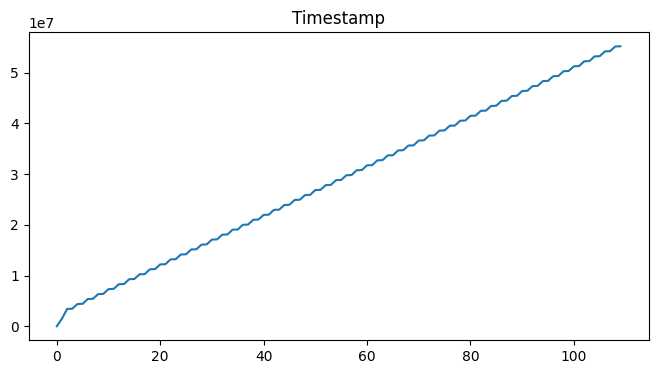

In [ ]:
from matplotlib import pyplot as plt
df['Timestamp'].plot(kind='line', figsize=(8, 4), title='Timestamp')

We notice that the values less than 0.5*10^7 are when we initially waited, so we can discard the beginning probably.

<Axes: title={'center': 'Timestamp'}>

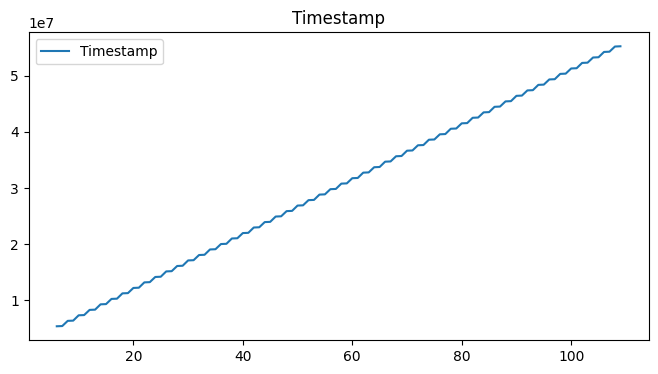

In [ ]:
fixedData = df.loc[df['Timestamp'] > 0.5*10**7]
fixedData.plot(kind='line', figsize=(8, 4), title='Timestamp')

Taking $T_{avg} =$ (UP to UP + DOWN to DOWN)/2

    UP-to-UP (s)  DOWN-to-DOWN (s)  Average Period (s)
0       0.963936          0.964064            0.964000
1       0.989344          0.989328            0.989336
2       0.964064          0.964384            0.964224
3       0.989248          0.989216            0.989232
4       0.964192          0.964500            0.964346
5       0.989204          0.989180            0.989192
6       0.964428          0.964596            0.964512
7       0.989188          0.989228            0.989208
8       0.964428          0.964560            0.964494
9       0.989248          0.989252            0.989250
10      0.964484          0.964512            0.964498
11      0.989212          0.989244            0.989228
12      0.964416          0.964464            0.964440
13      0.989200          0.989204            0.989202
14      0.964292          0.964332            0.964312
15      0.989196          0.989200            0.989198
16      0.964100          0.964212            0.964156
17      0.

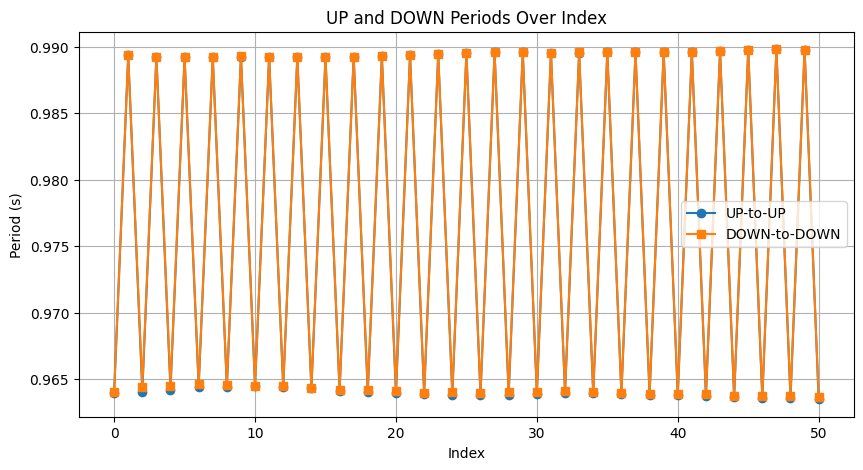

In [ ]:
timestamps_up = fixedData[fixedData['Direction'] == 'UP']['Timestamp'].values
timestamps_down = fixedData[fixedData['Direction'] == 'DOWN']['Timestamp'].values

periods_up = np.diff(timestamps_up)
periods_down = np.diff(timestamps_down)

# Convert to seconds (possible microseconds?)
periods_up_s = periods_up / 1e6
periods_down_s = periods_down / 1e6

min_len = min(len(periods_up_s), len(periods_down_s))
average_periods = (periods_up_s[:min_len] + periods_down_s[:min_len]) / 2

time_df = pd.DataFrame({
    "UP-to-UP (s)": periods_up_s[:min_len],
    "DOWN-to-DOWN (s)": periods_down_s[:min_len],
    "Average Period (s)": average_periods
})

print(time_df)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(time_df["UP-to-UP (s)"], marker='o', label="UP-to-UP")
plt.plot(time_df["DOWN-to-DOWN (s)"], marker='s', label="DOWN-to-DOWN")

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Period (s)")
plt.title("UP and DOWN Periods Over Index")
plt.legend()
plt.grid(True)

plt.show()